In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand
import pickle as rick

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_tau = 1776.86E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
C_eB = 10 ** -10
C_eW = C_eB
C_eH = 10 ** -10
C_HB = 2 * 10 ** -10
C_HW = 10 ** -10
C_HD = 10 ** -10
C_HWB = C_HD
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB

def diff_decay(s, t, m):
    N = (e ** 4 * m ** 2) / (256 * np.pi ** 3 * sin ** 2 * m_W ** 2 * m_h ** 3)
    u = m_h ** 2 + 2 * m ** 2 - s - t
    den_1 = (t - m ** 2)
    den_2 = (u - m ** 2)
    p_1 = (9 * m ** 4 + m ** 2 * (-2 * s + t - 3 * u) + t * u) / den_1 ** 2
    p_2 = (9 * m ** 4 + m ** 2 * (-2 * s + u - 3 * t) + t * u) / den_2 ** 2
    p_3 = (34 * m ** 4 - 2 * m ** 2 * (8 * s + 5 * (u + t)) + 2 * (s + t) * (s + u)) / (den_1 * den_2)
    return N * (p_1 + p_2 + p_3)

def diff_decay2(s, t, ml, C_eB, C_eW, C_AA, C_AZ, C_eH, SW, CW):
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = (4 * e ** 2 * (m_h ** 4 + s ** 2)) / (t * u) #1/v^2
    
    f6_AA = (-64 * C_AA * ml ** 2 * m_W ** 2) / (v ** 2 * s * (t - ml ** 2) * (u - ml ** 2)) #1/v^2
    struc_6_AA = f6_AA * (-(t - ml ** 2) ** 3 - (u - ml ** 2) ** 3 + (t - ml ** 2) ** 2 * (u - ml ** 2) + (t - ml ** 2) * (u - ml ** 2) * (u - ml ** 2 - 4 * m_h ** 2) + 4 * ml ** 2 * (u + t - 2 * ml ** 2) ** 2)
    f8_AA = (64 * C_AA ** 2 * m_W ** 2 * SW ** 2) / s
    struc_8_AA = f8_AA * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f6_AZ = ((-8 * C_AZ * ml ** 2 * m_W ** 2 * SW ** 2 * (CW ** 2 - 3 * SW ** 2)) / (SW * CW * v ** 2 * (u - ml ** 2) * (t - ml ** 2))) * ((m_Z ** 2 - Gam_Z ** 2 - s) / ((m_Z ** 2 - Gam_Z ** 2 - s) ** 2 + 4 * m_Z ** 2 * Gam_Z ** 2)) #1/v^2
    struc_6_AZ = f6_AZ * (-(t - ml ** 2) ** 3 - (u - ml ** 2) ** 3 + (t - ml ** 2) ** 2 * (u - ml ** 2) + (t - ml ** 2) * (u - ml ** 2) * (u - ml ** 2 - 4 * m_h ** 2) + 4 * ml ** 2 * (u + t - 2 * ml ** 2) ** 2)
    f8_AZ = (2 * C_AZ ** 2 * m_W ** 2) / (CW ** 2 * (Gam_Z ** 2 * m_Z ** 2 + (m_Z ** 2 - s) ** 2))
    struc_8_AZ = f8_AZ * (CW ** 4 - 2 * CW ** 2 * SW ** 2 + 5 * SW ** 4) * s * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f8_AA_AZ = ((16 * C_AA * C_AZ * m_W ** 2 * SW * (1 - 4 * SW ** 2)) / (CW)) * ((m_Z ** 2 - Gam_Z ** 2 - s) / ((m_Z ** 2 - Gam_Z ** 2 - s) ** 2 + 4 * m_Z ** 2 * Gam_Z ** 2))
    struc_8_AA_AZ = f8_AA_AZ * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f6_eH = (-16 * 2 ** 0.5 * ml * m_W ** 2 * SW ** 2 * C_eH) / (v * (u - ml ** 2) * (t - ml ** 2)) #1/v
    struc_6_eH = f6_eH * (2 * m_h ** 4 - 2 * m_h ** 2 * (u + t - 2 * ml ** 2) + (u + t - 2 * ml ** 2) ** 2)
    f8_eH = (8 * m_W ** 2 * SW ** 2 * v ** 2 * C_eH ** 2) / ((u - ml ** 2) * (t - ml ** 2)) #v^2
    struc_8_eH = f8_eH * (2 * m_h ** 4 - 2 * m_h ** 2 * (u + t - 2 * ml ** 2) + (u + t - 2 * ml ** 2) ** 2)
    
    f8_eBeW_o = 1 
    struc_8_eBeW_o = f8_eBeW_o * (- 16 * SW * m_h ** 2 * m_W * v * C_eH * (SW * C_eW - CW * C_eB)) #v
    
    struc_8_eBeW = 8 * (u - ml ** 2) * (t - ml ** 2) * (SW * C_eW - CW * C_eB) ** 2 
    
    f6_eBeW = (m_h ** 2 * m_W * SW * ml) / (v ** 2) #1/v^2
    struc_6_eBeW = f6_eBeW * (16 * 2 ** 0.5 + (8 * 2 ** 0.5 * ml * CW) / (u)) * (SW * C_eW - CW * C_eB)
    
    return np.concatenate((N * (ml / v) ** 2 * np.array([struc_4]), N * np.array([struc_6_AA, struc_6_AZ, struc_6_eH, struc_6_eBeW]), N * np.array([struc_8_AA, struc_8_AZ, struc_8_eH, struc_8_AA_AZ, struc_8_eBeW, struc_8_eBeW_o])), axis=0)

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand
import pickle as rick
from sympy.parsing.mathematica import mathematica
from sympy import var

CW2,SW2,Gam_Z,pi,alpha,a1,a2,b1,b2,acon1,acon2,bcon1,bcon2,s,t,m_h,m,SW,CW,CeB,CeW,CeH,CHWB,CHD,CHbox,v,m_W,CHAA,CHAZ,MZ2 = var('CW2 SW2 Gam_Z pi alpha a1 a2 b1 b2 acon1 acon2 bcon1 bcon2 s t m_h m SW CW CeB CeW CeH CHWB CHD CHbox v m_W CHAA CHAZ MZ2')

DipLoop = '-Sqrt[2] (CeB CW - CeW SW) (2 s - m_h^2) (acon2 s + b2 s + bcon2 s - a1 t - acon1 t + acon2 t - b1 t + b2 t - bcon1 t + bcon2 t + a2 (s + t) - (a2 + acon2 + b2 + bcon2) m_h^2) m'
DipLoop_py = mathematica(DipLoop)
RemLoop = '-(1/(t (s + t - m_h^2)))Sqrt[2] CeH m_W SW v (s (s + 2 t) (b2 s + bcon2 s + a1 t + acon1 t +b1 t + b2 t + bcon1 t + bcon2 t + a2 (s + t) + acon2 (s + t)) - (a2 + acon2 + b2 + bcon2) s (3 s + 4 t) m_h^2 + (3 b2 s + 3 bcon2 s - a1 t - acon1 t - b1 t + b2 t - bcon1 t + bcon2 t + a2 (3 s + t) + acon2 (3 s + t)) m_h^4 - (a2 + acon2 + b2 + bcon2) m_h^6) m + 1/(2 SW t (s + t - m_h^2))m_W (4 CHWB CW SW + (CHD (-1 + 2 CW^2) + 4 CHbox SW^2)) (s (s + 2 t) (b2 s + bcon2 s + a1 t + acon1 t + b1 t + b2 t + bcon1 t + bcon2 t + a2 (s + t) + acon2 (s + t)) - (a2 + acon2 + b2 + bcon2) s (3 s + 4 t) m_h^2 + (3 b2 s + 3 bcon2 s -a1 t - acon1 t - b1 t + b2 t - bcon1 t + bcon2 t + a2 (3 s + t) + acon2 (3 s + t)) m_h^4 - (a2 + acon2 + b2 + bcon2) m_h^6) m^2'
RemLoop_py = mathematica(RemLoop)

TreeLoop = '(2/(m_W SW t (s + t - m_h^2))) alpha pi (s (s + 2 t) ((a2 + acon2 + b2 + bcon2) s + (a1 + a2 + acon1 + acon2 + b1 + b2 + bcon1 + bcon2) t) - (a2 + acon2 + b2 + bcon2) s (3 s + 4 t) m_h^2 + (3 (a2 + acon2 + b2 + bcon2) s + (-a1 + a2 - acon1 + acon2 - b1 + b2 - bcon1 + bcon2) t) m_h^4 - (a2 + acon2 + b2 + bcon2) m_h^6) m^2'
TreeLoop_py = mathematica(TreeLoop)
selfLoop = '1/2 s ((a1 acon1 + b1 bcon1) t^2 + a2 acon2 (s + t)^2 + b2 bcon2 (s + t)^2 + (a2 acon2 + b2 bcon2) m_h^2 (-2 (s + t) + m_h^2)) + 1/2 ((a1 acon2 + b2 (2 acon2 + bcon1 - 4 bcon2) + b1 bcon2 + a2 (acon1 - 4 acon2 + 2 bcon2)) s^2 - 2 (acon2 b1 + acon1 b2 - 2 acon2 b2 + b1 bcon1 - b2 bcon1 + a2 (-acon1 + 3 acon2 + bcon1 - 2 bcon2) - b1 bcon2 + 3 b2 bcon2 + a1 (acon1 - acon2 + bcon2)) s t + 2 (-a1 + a2 + b1 - b2) (acon1 - acon2 - bcon1 + bcon2) t^2 - 2 ((a1 acon2 + b2 (2 acon2 + bcon1 - 3 bcon2) + b1 bcon2 + a2 (acon1 - 3 acon2 + 2 bcon2)) s + (a1 acon2 - acon2 b1 - acon1 b2 + 2 acon2 b2 + b2 bcon1 + (-a1 + b1 - 2 b2) bcon2 +a2 (acon1 - 2 acon2 - bcon1 + 2 bcon2)) t) m_h^2 + (a1 acon2 + b2 (2 acon2 + bcon1 - 2 bcon2) + b1 bcon2 + a2 (acon1 - 2 acon2 + 2 bcon2)) m_h^4) m^2'
selfLoop_py = mathematica(selfLoop)
selfTree = '-((16 (alpha^2 pi^2 (s^2 + m_h^4)) m^2)/(m_W^2 SW^2 t (s + t - m_h^2)))'
selfTree_py = mathematica(selfTree)

DipRem = '16 CeH m_W SW (CeB CW - CeW SW) v m_h^2'
DipRem_py = mathematica(DipRem)
TreeRem = '(16 Sqrt[2] alpha CeH pi v (s^2 + m_h^4) m)/(t (s + t - m_h^2)) - (8 (alpha pi (CHD (-1 + 2 CW^2) + 4 SW (CHWB CW + CHbox SW)) (s^2 +m_h^4)) m^2)/(SW^2 t (s + t - m_h^2))'
TreeRem_py = mathematica(TreeRem)
selfRem = '-((8 (CeH^2 m_W^2 SW^2 v^2 (s^2 + m_h^4)))/(t (s + t - m_h^2)))'
selfRem_py = mathematica(selfRem)
TreeDip = '(16 Sqrt[2] alpha pi (-CeB CW + CeW SW) m_h^2 m)/(m_W SW)'
TreeDip_py = mathematica(TreeDip)
selfDip = '-8 ((CeB CW - CeW SW)^2 t (s + t - m_h^2))'
selfDip_py = mathematica(selfDip)

TreeHAA = '(64 alpha CHAA m^2 pi (s (s + 2 t)^2 - s (3 s + 4 t) m_h^2 + 3 s m_h^4 - m_h^6))/(s t (s + t - m_h^2))'
TreeHAA_py = mathematica(TreeHAA)
TreeHAZ = '(8 alpha CHAZ m^2 pi (CW^2 - 3 SW^2) (MZ2 - s - Gam_Z^2) (s (s + 2 t)^2 - s (3 s + 4 t) m_h^2 + 3 s m_h^4 - m_h^6))/(CW SW t (4 MZ2 Gam_Z^2 + (MZ2 - s - Gam_Z^2)^2) (s + t - m_h^2))'
TreeHAZ_py = mathematica(TreeHAZ)
HAAHAZ = '(16 CHAA CHAZ m_W^2 SW (CW^2 - 3 SW^2) (MZ2 - s - Gam_Z^2) (s^2 + 2 s t + 2 t^2 - 2 (s + t) m_h^2 + m_h^4))/(CW (4 MZ2 Gam_Z^2 + (MZ2 - s - Gam_Z^2)^2))'
HAAHAZ_py = mathematica(HAAHAZ)
selfHAA = '(64 CHAA^2 m_W^2 SW^2 (s^2 + 2 s t + 2 t^2 - 2 (s + t) m_h^2 + m_h^4))/s'
selfHAA_py = mathematica(selfHAA)
selfHAZ = '(2 CHAZ^2 m_W^2 s (CW^4 - 2 CW^2 SW^2 + 5 SW^4) (t^2 + (s + t - m_h^2)^2))/(CW^2 ((MZ2 - s)^2 + MZ2 Gam_Z^2))'
selfHAZ_py = mathematica(selfHAZ)

LoopHAAHAZ = '(1/s)m_W (4 CHAA SW (s (-((a2 + acon2) m^2 s) + (a2 + acon2 + b2 + bcon2) s^2 - 2 (a2 + acon2) m^2 t + 2 (a2 + acon2 + b2 + bcon2) s t + (a1 + a2 + acon1 + acon2 + b1 + b2 + bcon1 + bcon2) t^2) - 2 (a2 + acon2 + b2 + bcon2) s (s + t) m_h^2 + ((a2 + acon2) m^2 + (a2 + acon2 + b2 + bcon2) s) m_h^4) + ((MZ2 - s - Gam_Z^2) (-4 CHAA CW (MZ2 - s) SW (s (-((a2 + acon2) m^2 s) + (a2 + acon2 + b2 + bcon2) s^2 - 2 (a2 + acon2) m^2 t + 2 (a2 + acon2 + b2 + bcon2) s t + (a1 + a2 + acon1 + acon2 + b1 + b2 + bcon1 + bcon2) t^2) - 2 (a2 + acon2 + b2 + bcon2) s (s + t) m_h^2 + ((a2 + acon2) m^2 + (a2 + acon2 + b2 + bcon2) s) m_h^4) + m^2 (s (b1 CHAZ CW^2 s^2 - 3 b2 CHAZ CW^2 s^2 + bcon1 CHAZ CW^2 s^2 - 3 bcon2 CHAZ CW^2 s^2 + 4 a1 CHAA CW MZ2 s SW + 4 acon1 CHAA CW MZ2 s SW + 4 b1 CHAA CW MZ2 s SW - 4 b2 CHAA CW MZ2 s SW + 4 bcon1 CHAA CW MZ2 s SW - 4 bcon2 CHAA CW MZ2 s SW - 4 a1 CHAA CW s^2 SW - 4 acon1 CHAA CW s^2 SW - 4 b1 CHAA CW s^2 SW + 4 b2 CHAA CW s^2 SW - 4 bcon1 CHAA CW s^2 SW + 4 bcon2 CHAA CW s^2 SW - 2 a1 CHAZ s^2 SW^2 - 2 acon1 CHAZ s^2 SW^2 - b1 CHAZ s^2 SW^2 - b2 CHAZ s^2 SW^2 - bcon1 CHAZ s^2 SW^2 -bcon2 CHAZ s^2 SW^2 + 2 (-2 (b2 + bcon2) CHAZ CW^2 s + 4 a1 CHAA CW (-MZ2 + s) SW + 4 acon1 CHAA CW (-MZ2 + s) SW + 4 (b1 + b2 + bcon1 + bcon2) CHAA CW (-MZ2 + s) SW + 2 (b1 + bcon1) CHAZ s SW^2 + a1 CHAZ s (-CW^2 + SW^2) + acon1 CHAZ s (-CW^2 + SW^2)) t + 2 a2 (-2 CHAA CW (MZ2 - s) SW (s + 2 t) + CHAZ s (CW^2 (s + t) + SW^2 (2 s + 3 t))) + 2 acon2 (-2 CHAA CW (MZ2 - s) SW (s + 2 t) + CHAZ s (CW^2 (s + t) + SW^2 (2 s + 3 t)))) + 2 s (-b1 CHAZ CW^2 s + 2 b2 CHAZ CW^2 s - bcon1 CHAZ CW^2 s + 2 bcon2 CHAZ CW^2 s - 4 (a1 + acon1) CHAA CW MZ2 SW - 4 b1 CHAA CW MZ2 SW - 4 bcon1 CHAA CW MZ2 SW + 4 a1 CHAA CW s SW + 4 acon1 CHAA CW s SW + 4 b1 CHAA CW s SW + 4 bcon1 CHAA CW s SW + 2 a1 CHAZ s SW^2 + 2 acon1 CHAZ s SW^2 + b1 CHAZ s SW^2 + 2 b2 CHAZ s SW^2 + bcon1 CHAZ s SW^2 + 2 bcon2 CHAZ s SW^2 + (a1 + acon1 - b1 + b2 - bcon1 + bcon2) CHAZ (CW^2 + SW^2) t - a2 CHAZ (CW^2 + SW^2) (2 s + t) - acon2 CHAZ (CW^2 + SW^2) (2 s + t)) m_h^2 + (2 a2 CHAZ CW^2 s + 2 acon2 CHAZ CW^2 s + b1 CHAZ CW^2 s - b2 CHAZ CW^2 s + bcon1 CHAZ CW^2 s - bcon2 CHAZ CW^2 s + 4 (a1 + acon1) CHAA CW MZ2 SW + 4 b1 CHAA CW MZ2 SW + 4 b2 CHAA CW MZ2 SW + 4 bcon1 CHAA CW MZ2 SW + 4 bcon2 CHAA CW MZ2 SW + 4 a2 CHAA CW (MZ2 - s) SW + 4 acon2 CHAA CW (MZ2 - s) SW - 4 a1 CHAA CW s SW - 4 acon1 CHAA CW s SW - 4 b1 CHAA CW s SW - 4 b2 CHAA CW s SW - 4 bcon1 CHAA CW s SW - 4 bcon2 CHAA CW s SW - (2 a1 + 2 acon1 + b1 + 3 b2 + bcon1 + 3 bcon2) CHAZ s SW^2) m_h^4) + s ((b1 (4 CHAA CW (MZ2 - s) SW + CHAZ s (CW^2 - SW^2)) + bcon1 (4 CHAA CW (MZ2 - s) SW + CHAZ s (CW^2 - SW^2)) + 2 (a1 + acon1) (2 CHAA CW (MZ2 - s) SW - CHAZ s SW^2)) t^2 + (b2 (4 CHAA CW (MZ2 - s) SW + CHAZ s (CW^2 - SW^2)) + bcon2 (4 CHAA CW (MZ2 - s) SW + CHAZ s (CW^2 - SW^2)) + 2 (a2 + acon2) (2 CHAA CW (MZ2 - s) SW - CHAZ s SW^2)) (s + t - m_h^2)^2)))/(CW (4 MZ2 Gam_Z^2 + (-MZ2 + s + Gam_Z^2)^2)))'
LoopHAAHAZ_py = mathematica(LoopHAAHAZ)

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_tau = 1776.86E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
pi = np.pi
SW = sin
CW = cos
MZ2 = m_Z ** 2

CeB = 10 ** -10
CeW = CeB
CeH = 10 ** -10
CHB = 2 * 10 ** -10
CHW = 10 ** -10
CHD = 10 ** -10
CHWB = CHD
CHbox = 10 ** -10
CHAA = cos ** 2 * CHB + sin ** 2 * CHW - sin * cos * CHWB
CHAZ = 2 * sin * cos * (CHW - CHB) - (cos ** 2 - sin ** 2) * CHWB

def diff_decay2(s, t, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB):
    CHAA = sin ** 2 * CHB + sin ** 2 * CHW - sin * cos * CHWB
    CHAZ = 2 * sin * cos * (CHW - CHB) - (cos ** 2 - sin ** 2) * CHWB
    SW = sin
    CW = cos
    pi = np.pi
    N = 1 / (32 * (2 * pi) ** 3  * m_h ** 3)
    
    struc_4 = -16*pi**2*alpha**2*m**2*(m_h**4 + s**2)/(SW**2*m_W**2*t*(-m_h**2 + s + t)) #selfTree_py
    
    struc_6_AA = 64*pi*CHAA*alpha*m**2*(-m_h**6 + 3*m_h**4*s - m_h**2*s*(3*s + 4*t) + s*(s + 2*t)**2)/(s*t*(-m_h**2 + s + t)) #TreeHAA_py
    struc_6_AZ = 8*pi*CHAZ*alpha*m**2*(CW**2 - 3*SW**2)*(-Gam_Z**2 + MZ2 - s)*(-m_h**6 + 3*m_h**4*s - m_h**2*s*(3*s + 4*t) + s*(s + 2*t)**2)/(CW*SW*t*(4*Gam_Z**2*MZ2 + (-Gam_Z**2 + MZ2 - s)**2)*(-m_h**2 + s + t)) #TreeHAZ_py
    struc_6_eBeW = 16*np.sqrt(2)*pi*alpha*m*m_h**2*(-CW*CeB + CeW*SW)/(SW*m_W) #TreeDip_py
    struc_61_rem = 16*np.sqrt(2)*pi*CeH*alpha*m*v*(m_h**4 + s**2)/(t*(-m_h**2 + s + t)) #TreeRem_py
    struc_62_rem = - 8*pi*alpha*m**2*(m_h**4 + s**2)*(CHD*(2*CW**2 - 1) + 4*SW*(CHWB*CW + CHbox*SW))/(SW**2*t*(-m_h**2 + s + t))
    
    struc_8_AA = 64*CHAA**2*SW**2*m_W**2*(m_h**4 - m_h**2*(2*s + 2*t) + s**2 + 2*s*t + 2*t**2)/s #selfHAA_py
    struc_8_AZ = 2*CHAZ**2*m_W**2*s*(t**2 + (-m_h**2 + s + t)**2)*(CW**4 - 2*CW**2*SW**2 + 5*SW**4)/(CW**2*(Gam_Z**2*MZ2 + (MZ2 - s)**2)) #selfHAZ_py
    struc_8_AAAZ = 16*CHAA*CHAZ*SW*m_W**2*(CW**2 - 3*SW**2)*(-Gam_Z**2 + MZ2 - s)*(m_h**4 - m_h**2*(2*s + 2*t) + s**2 + 2*s*t + 2*t**2)/(CW*(4*Gam_Z**2*MZ2 + (-Gam_Z**2 + MZ2 - s)**2)) #HAAHAZ_py
    struc_8_eBeW = -8*t*(CW*CeB - CeW*SW)**2*(-m_h**2 + s + t) #selfDip_py
    struc_8_rem = -8*CeH**2*SW**2*m_W**2*v**2*(m_h**4 + s**2)/(t*(-m_h**2 + s + t)) #selfRem_py
    
    return N * np.concatenate((np.array([struc_4]), np.array([struc_6_AA, struc_6_AZ, struc_6_eBeW, struc_61_rem, struc_62_rem]), np.array([struc_8_AA, struc_8_AZ, struc_8_AAAZ, struc_8_eBeW, struc_8_rem])), axis=0)

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

In [22]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
s_subs = s_min_fix + (s_max_fix - s_min_fix) * 0.2 #primed
t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * 0.5 #unprimed
print(diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[9])

2.922842009487672e-21


In [2]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s4(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_4 = np.zeros(bins, dtype=float) 
    dr = (s_max_fix - s_min_fix) / len(dI_4)
    dI_4_t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_4)
    dI_4cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_4cos) 
    dI_4cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_4cos_alt)
    
    #I_4 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[0]
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_4 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[0]
        
    else:
        I_4 = 0
    
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_4[j] = I_4
    dI_4_t[j_t] = I_4

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_4cos[j_cos] = I_4
    dI_4cos_alt[j_cos_alt] = I_4
   
    return dict(I_4=I_4, dI_4=dI_4, dI_4_t=dI_4_t, dI_4cos=dI_4cos, dI_4cos_alt=dI_4cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s4, nitn = nitns, neval = nevals)
total_rate4 = total_decay_integ(total_s4, nitn = nitns, neval = nevals)
print(total_rate4.summary())
print('Sum(dI/I) =', sum(total_rate4['dI_4']) / total_rate4['I_4']) #should be 1

computed_4 = total_rate4['I_4'].mean
error_4 = total_rate4['I_4'].sdev
rick.dump([computed_4, error_4], open('I4_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_4)+' +/ '+str(error_4)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.5369(16)e-08  2.5369(16)e-08      0.00     1.00
  2   2.5383(15)e-08  2.53594(91)e-08     0.94     0.87
  3   2.5398(14)e-08  2.53663(71)e-08     0.96     0.84
  4   2.5388(14)e-08  2.53676(60)e-08     0.99     0.67
  5   2.5373(13)e-08  2.53655(53)e-08     0.99     0.58

Sum(dI/I) = 1.000000000009(11)
Vegas Cross-Section = 2.536553346935638e-08 +/ 5.27184258181058e-12


In [3]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s6_1(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_6_1 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_6_1) 
    dI_6_1t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_6_1t) 
    dI_6_1cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_6_1cos) 
    dI_6_1cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_6_1cos_alt)
    
    #I_6_1 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[1])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_6_1 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[1])
        
    else:
        
        I_6_1 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_6_1[j] = I_6_1
    dI_6_1t[j_t] = I_6_1

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_6_1cos[j_cos] = I_6_1
    dI_6_1cos_alt[j_cos_alt] = I_6_1
   
    return dict(I_6_1=I_6_1, dI_6_1=dI_6_1, dI_6_1t=dI_6_1t, dI_6_1cos=dI_6_1cos, dI_6_1cos_alt=dI_6_1cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s6_1, nitn=nitns, neval=nevals)
total_rate6_1 = total_decay_integ(total_s6_1, nitn = nitns, neval = nevals)
print(total_rate6_1.summary())
print('Sum(dI/I) =', sum(total_rate6_1['dI_6_1']) / total_rate6_1['I_6_1'])

computed_6_1 = total_rate6_1['I_6_1'].mean
error_6_1 = total_rate6_1['I_6_1'].sdev
rick.dump([computed_6_1, error_6_1], open('I61_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_6_1)+' +/ '+str(error_6_1)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.4416(12)e-13  1.4416(12)e-13      0.00     1.00
  2   1.4413(10)e-13  1.44048(66)e-13     0.92     0.95
  3   1.44138(94)e-13 1.44033(51)e-13     0.95     0.92
  4   1.44174(93)e-13 1.44050(42)e-13     1.01     0.41
  5   1.44221(79)e-13 1.44072(36)e-13     1.03     0.14

Sum(dI/I) = 0.9999999999982(81)
Vegas Cross-Section = 1.4407231156405557e-13 +/ 3.571058742004485e-17


In [4]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s6_2(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_6_2 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_6_2) 
    dI_6_2t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_6_2t) 
    dI_6_2cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_6_2cos) 
    dI_6_2cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_6_2cos_alt)
    
    #I_6_2 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[2])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_6_2 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[2])
        
    else:
        
        I_6_2 = 0
    
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_6_2[j] = I_6_2
    dI_6_2t[j_t] = I_6_2

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_6_2cos[j_cos] = I_6_2
    dI_6_2cos_alt[j_cos_alt] = I_6_2
   
    return dict(I_6_2=I_6_2, dI_6_2=dI_6_2, dI_6_2t=dI_6_2t, dI_6_2cos=dI_6_2cos, dI_6_2cos_alt=dI_6_2cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s6_2, nitn=nitns, neval=nevals)
total_rate6_2 = total_decay_integ(total_s6_2, nitn = nitns, neval = nevals, adapt = False)
print(total_rate6_2.summary())
print('Sum(dI/I) =', sum(total_rate6_2['dI_6_2']) / total_rate6_2['I_6_2']) #should be 1

computed_6_2 = total_rate6_2['I_6_2'].mean
error_6_2 = total_rate6_2['I_6_2'].sdev
rick.dump([computed_6_2, error_6_2], open('I62_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_6_2)+' +/ '+str(error_6_2)+'')

itn   integral        average         chi2/dof        Q
-------------------------------------------------------
  1   -9.2094(98)e-15 -9.2094(98)e-15     0.00     1.00
  2   -9.209(11)e-15  -9.2093(72)e-15     0.94     0.89
  3   -9.189(12)e-15  -9.2026(63)e-15     0.89     1.00
  4   -9.222(13)e-15  -9.2075(57)e-15     0.94     0.99
  5   -9.2066(93)e-15 -9.2073(49)e-15     0.93     1.00

Sum(dI/I) = 1.000000000000(23)
Vegas Cross-Section = -9.207336759200148e-15 +/ 4.895020777721877e-18


In [5]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 10
nevals = 5 * 10 ** 4
bins = 200

def total_s6_3(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_6_3 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_6_3) 
    dI_6_3t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_6_3t) 
    dI_6_3cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_6_3cos) 
    dI_6_3cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_6_3cos_alt)
    
    #I_6_3 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[3])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_6_3 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[3])
        
    else:
        
        I_6_3 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_6_3[j] = I_6_3
    dI_6_3t[j_t] = I_6_3

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_6_3cos[j_cos] = I_6_3
    dI_6_3cos_alt[j_cos_alt] = I_6_3
   
    return dict(I_6_3=I_6_3, dI_6_3=dI_6_3, dI_6_3t=dI_6_3t, dI_6_3cos=dI_6_3cos, dI_6_3cos_alt=dI_6_3cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s6_3, nitn=nitns, neval=nevals)
total_rate6_3 = total_decay_integ(total_s6_3, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate6_3.summary())
print('Sum(dI/I) =', sum(total_rate6_3['dI_6_3']) / total_rate6_3['I_6_3']) #should be 1

computed_6_3 = total_rate6_3['I_6_3'].mean
error_6_3 = total_rate6_3['I_6_3'].sdev
rick.dump([computed_6_3, error_6_3], open('I63_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_6_3)+' +/ '+str(error_6_3)+'')

itn   integral        wgt average      chi2/dof        Q
--------------------------------------------------------
  1   -6.9508(16)e-12 -6.9508(16)e-12      0.00     1.00
  2   -6.9559(16)e-12 -6.9520(10)e-12      1.05     0.16
  3   -6.9528(15)e-12 -6.95167(78)e-12     0.96     0.87
  4   -6.9540(15)e-12 -6.95206(67)e-12     0.94     0.98
  5   -6.9557(15)e-12 -6.95255(59)e-12     0.99     0.63
  6   -6.9550(14)e-12 -6.95298(53)e-12     0.99     0.69
  7   -6.9513(13)e-12 -6.95259(49)e-12     1.00     0.43
  8   -6.9551(17)e-12 -6.95270(46)e-12     1.00     0.42
  9   -6.9516(16)e-12 -6.95255(43)e-12     1.02     0.13
 10   -6.9534(15)e-12 -6.95254(41)e-12     1.01     0.19

Sum(dI/I) = 1.0000000000022(95)
Vegas Cross-Section = -6.952536743851523e-12 +/ 4.074120713190159e-16


In [6]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s6_4(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_6_4 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_6_4) 
    dI_6_4t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_6_4t) 
    dI_6_4cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_6_4cos) 
    dI_6_4cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_6_4cos_alt)
    
    #I_6_4 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[4])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_6_4 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[4])
        
    else:
        
        I_6_4 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_6_4[j] = I_6_4
    dI_6_4t[j_t] = I_6_4

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_6_4cos[j_cos] = I_6_4
    dI_6_4cos_alt[j_cos_alt] = I_6_4
   
    return dict(I_6_4=I_6_4, dI_6_4=dI_6_4, dI_6_4t=dI_6_4t, dI_6_4cos=dI_6_4cos, dI_6_4cos_alt=dI_6_4cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s6_4, nitn=nitns, neval=nevals)
total_rate6_4 = total_decay_integ(total_s6_4, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate6_4.summary())
print('Sum(dI/I) =', sum(total_rate6_4['dI_6_4']) / total_rate6_4['I_6_4']) #should be 1

computed_6_4 = total_rate6_4['I_6_4'].mean
error_6_4 = total_rate6_4['I_6_4'].sdev
rick.dump([computed_6_4, error_6_4], open('I64_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_6_4)+' +/ '+str(error_6_4)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   -5.0686(31)e-10 -5.0686(31)e-10     0.00     1.00
  2   -5.0708(29)e-10 -5.0683(17)e-10     1.03     0.29
  3   -5.0677(28)e-10 -5.0679(14)e-10     1.04     0.16
  4   -5.0707(26)e-10 -5.0683(12)e-10     1.08     0.00
  5   -5.0680(27)e-10 -5.0675(10)e-10     1.08     0.00

Sum(dI/I) = 0.9999999999605(67)
Vegas Cross-Section = -5.067458585517725e-10 +/ 1.0385208828870482e-13


In [7]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s6_5(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_6_5 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_6_5) 
    dI_6_5t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_6_5t) 
    dI_6_5cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_6_5cos) 
    dI_6_5cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_6_5cos_alt)
    
    #I_6_5 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[5])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_6_5 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[5])
        
    else:
        
        I_6_5 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_6_5[j] = I_6_5
    dI_6_5t[j_t] = I_6_5

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_6_5cos[j_cos] = I_6_5
    dI_6_5cos_alt[j_cos_alt] = I_6_5
   
    return dict(I_6_5=I_6_5, dI_6_5=dI_6_5, dI_6_5t=dI_6_5t, dI_6_5cos=dI_6_5cos, dI_6_5cos_alt=dI_6_5cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s6_5, nitn=nitns, neval=nevals)
total_rate6_5 = total_decay_integ(total_s6_5, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate6_5.summary())
print('Sum(dI/I) =', sum(total_rate6_5['dI_6_5']) / total_rate6_5['I_6_5']) #should be 1

computed_6_5 = total_rate6_5['I_6_5'].mean
error_6_5 = total_rate6_5['I_6_5'].sdev
rick.dump([computed_6_5, error_6_5], open('I65_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_6_5)+' +/ '+str(error_6_5)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.07264(60)e-12 1.07264(60)e-12     0.00     1.00
  2   1.07289(61)e-12 1.07219(36)e-12     1.00     0.48
  3   1.07334(59)e-12 1.07236(29)e-12     1.01     0.34
  4   1.07361(69)e-12 1.07251(24)e-12     1.06     0.03
  5   1.07247(51)e-12 1.07251(22)e-12     1.04     0.04

Sum(dI/I) = 1.000000000013(12)
Vegas Cross-Section = 1.072508954258581e-12 +/ 2.1566202983989796e-16


In [8]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s8_6(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_8_6 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_8_6) 
    dI_8_6t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_8_6t) 
    dI_8_6cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_8_6cos) 
    dI_8_6cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_8_6cos_alt)
    
    #I_8_6 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[6])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_8_6 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[6])
        
    else:
        
        I_8_6 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_8_6[j] = I_8_6
    dI_8_6t[j_t] = I_8_6

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_8_6cos[j_cos] = I_8_6
    dI_8_6cos_alt[j_cos_alt] = I_8_6
   
    return dict(I_8_6=I_8_6, dI_8_6=dI_8_6, dI_8_6t=dI_8_6t, dI_8_6cos=dI_8_6cos, dI_8_6cos_alt=dI_8_6cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s8_6, nitn=nitns, neval=nevals)
total_rate8_6 = total_decay_integ(total_s8_6, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate8_6.summary())
print('Sum(dI/I) =', sum(total_rate8_6['dI_8_6']) / total_rate8_6['I_8_6']) #should be 1

computed_8_6 = total_rate8_6['I_8_6'].mean
error_8_6 = total_rate8_6['I_8_6'].sdev
rick.dump([computed_8_6, error_8_6], open('I86_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_8_6)+' +/ '+str(error_8_6)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.2629(10)e-14  2.2629(10)e-14      0.00     1.00
  2   2.26480(81)e-14 2.26400(61)e-14     0.96     0.81
  3   2.26385(80)e-14 2.26381(47)e-14     0.99     0.65
  4   2.26244(75)e-14 2.26323(40)e-14     0.98     0.72
  5   2.26417(73)e-14 2.26333(34)e-14     0.99     0.71

Sum(dI/I) = 0.9999999995049(63)
Vegas Cross-Section = 2.263327556979221e-14 +/ 3.412902013948057e-18


In [9]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 10
nevals = 5 * 10 ** 4
bins = 200

def total_s8_7(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_8_7 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_8_7) 
    dI_8_7t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_8_7t) 
    dI_8_7cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_8_7cos) 
    dI_8_7cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_8_7cos_alt)
    
    #I_8_7 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[7])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_8_7 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[7])
        
    else:
        
        I_8_7 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_8_7[j] = I_8_7
    dI_8_7t[j_t] = I_8_7

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_8_7cos[j_cos] = I_8_7
    dI_8_7cos_alt[j_cos_alt] = I_8_7
   
    return dict(I_8_7=I_8_7, dI_8_7=dI_8_7, dI_8_7t=dI_8_7t, dI_8_7cos=dI_8_7cos, dI_8_7cos_alt=dI_8_7cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s8_7, nitn=nitns, neval=nevals)
total_rate8_7 = total_decay_integ(total_s8_7, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate8_7.summary())
print('Sum(dI/I) =', sum(total_rate8_7['dI_8_7']) / total_rate8_7['I_8_7']) #should be 1

computed_8_7 = total_rate8_7['I_8_7'].mean
error_8_7 = total_rate8_7['I_8_7'].sdev
rick.dump([computed_8_7, error_8_7], open('I87_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_8_7)+' +/ '+str(error_8_7)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.89454(54)e-13 2.89454(54)e-13     0.00     1.00
  2   2.89509(57)e-13 2.89454(36)e-13     0.98     0.63
  3   2.89428(55)e-13 2.89432(29)e-13     1.02     0.31
  4   2.89494(52)e-13 2.89436(25)e-13     1.07     0.01
  5   2.89477(58)e-13 2.89439(22)e-13     1.07     0.00
  6   2.89420(49)e-13 2.89429(20)e-13     1.07     0.00
  7   2.89542(50)e-13 2.89438(18)e-13     1.07     0.00
  8   2.89502(47)e-13 2.89442(17)e-13     1.07     0.00
  9   2.89482(47)e-13 2.89444(16)e-13     1.06     0.00
 10   2.89409(46)e-13 2.89439(15)e-13     1.05     0.00

Sum(dI/I) = 0.9999999999918(69)
Vegas Cross-Section = 2.8943899090704693e-13 +/ 1.4712780721655097e-17


In [10]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s8_8(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_8_8 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_8_8) 
    dI_8_8t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_8_8t) 
    dI_8_8cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_8_8cos) 
    dI_8_8cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_8_8cos_alt)
    
    #I_8_8 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[8])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_8_8 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[8])
        
    else:
        
        I_8_8 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_8_8[j] = I_8_8
    dI_8_8t[j_t] = I_8_8

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_8_8cos[j_cos] = I_8_8
    dI_8_8cos_alt[j_cos_alt] = I_8_8
   
    return dict(I_8_8=I_8_8, dI_8_8=dI_8_8, dI_8_8t=dI_8_8t, dI_8_8cos=dI_8_8cos, dI_8_8cos_alt=dI_8_8cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s8_8, nitn=nitns, neval=nevals)
total_rate8_8 = total_decay_integ(total_s8_8, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate8_8.summary())
print('Sum(dI/I) =', sum(total_rate8_8['dI_8_8']) / total_rate8_8['I_8_8']) #should be 1

computed_8_8 = total_rate8_8['I_8_8'].mean
error_8_8 = total_rate8_8['I_8_8'].sdev
rick.dump([computed_8_8, error_8_8], open('I88_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_8_8)+' +/ '+str(error_8_8)+'')

itn   integral         wgt average      chi2/dof        Q
---------------------------------------------------------
  1   -2.3253(12)e-15  -2.3253(12)e-15      0.00     1.00
  2   -2.3272(14)e-15  -2.32516(81)e-15     0.97     0.75
  3   -2.3227(15)e-15  -2.32455(67)e-15     1.02     0.30
  4   -2.3218(12)e-15  -2.32347(55)e-15     1.05     0.06
  5   -2.32383(67)e-15 -2.32392(33)e-15     1.04     0.05

Sum(dI/I) = 0.999999999983(17)
Vegas Cross-Section = -2.3239212722317213e-15 +/ 3.3290826928269694e-19


In [11]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 5 * 10 ** 4
bins = 200

def total_s8_9(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_8_9 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_8_9) 
    dI_8_9t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_8_9t) 
    dI_8_9cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_8_9cos) 
    dI_8_9cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_8_9cos_alt)
    
    #I_8_9 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[9])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_8_9 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[9])
        
    else:
        
        I_8_9 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_8_9[j] = I_8_9
    dI_8_9t[j_t] = I_8_9

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_8_9cos[j_cos] = I_8_9
    dI_8_9cos_alt[j_cos_alt] = I_8_9
   
    return dict(I_8_9=I_8_9, dI_8_9=dI_8_9, dI_8_9t=dI_8_9t, dI_8_9cos=dI_8_9cos, dI_8_9cos_alt=dI_8_9cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s8_9, nitn=nitns, neval=nevals)
total_rate8_9 = total_decay_integ(total_s8_9, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate8_9.summary())
print('Sum(dI/I) =', sum(total_rate8_9['dI_8_9']) / total_rate8_9['I_8_9']) #should be 1

computed_8_9 = total_rate8_9['I_8_9'].mean
error_8_9 = total_rate8_9['I_8_9'].sdev
rick.dump([computed_8_9, error_8_9], open('I89_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_8_9)+' +/ '+str(error_8_9)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.05190(40)e-15 2.05190(40)e-15     0.00     1.00
  2   2.05173(40)e-15 2.05122(24)e-15     1.00     0.49
  3   2.05110(25)e-15 2.05109(15)e-15     1.06     0.05
  4   2.05079(33)e-15 2.05100(13)e-15     1.03     0.12
  5   2.05097(28)e-15 2.05097(12)e-15     1.01     0.38

Sum(dI/I) = 0.99999999997169(79)
Vegas Cross-Section = 2.0509702369304793e-15 +/ 1.1543411043986028e-19


In [13]:
m = m_m
k = 0.1
E_phot_min = 5
s_min_fix = 4 * m ** 2
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 5
nevals = 10 ** 5
bins = 200

def total_s8_10(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI_8_10 = np.zeros(bins, dtype=float)
    dr = (s_max_fix - s_min_fix) / len(dI_8_10) 
    dI_8_10t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI_8_10t) 
    dI_8_10cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_8_10cos) 
    dI_8_10cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_8_10cos_alt)
    
    #I_8_10 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)[10])
    
    if m_h ** 2 - 2 * m_h * E_phot_min >= s_subs >= (k * m_h) ** 2 and u >= (k * m_h) ** 2 and t_subs >= (k * m_h) ** 2 and E_phot(m, s_subs) > 5 and ((E_l(m, u) > 25 and E_lbar(m, t_subs) > 7) or (E_lbar(m, t_subs) > 25 and E_l(m, u) > 7)):
        
        I_8_10 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * (diff_decay2(s_subs, t_subs, m, CeB, CeW, CeH, CHD, CHbox, CHB, CHW, CHWB)[10])
        
    else:
        
        I_8_10 = 0
        
    j = int((s_subs - s_min_fix) / dr)
    j_t = int((t_subs - t_min_fix) / dr_t)

    dI_8_10[j] = I_8_10
    dI_8_10t[j_t] = I_8_10

    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)

    dI_8_10cos[j_cos] = I_8_10
    dI_8_10cos_alt[j_cos_alt] = I_8_10
   
    return dict(I_8_10=I_8_10, dI_8_10=dI_8_10, dI_8_10t=dI_8_10t, dI_8_10cos=dI_8_10cos, dI_8_10cos_alt=dI_8_10cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_decay_integ(total_s8_10, nitn=nitns, neval=nevals)
total_rate8_10 = total_decay_integ(total_s8_10, nitn = nitns, neval = nevals) #, adapt = False)
print(total_rate8_10.summary())
print('Sum(dI/I) =', sum(total_rate8_10['dI_8_10']) / total_rate8_10['I_8_10']) #should be 1

computed_8_10 = total_rate8_10['I_8_10'].mean
error_8_10 = total_rate8_10['I_8_10'].sdev
rick.dump([computed_8_10, error_8_10], open('I810_Tree_result', 'wb'))
print('Vegas Cross-Section = '+str(computed_8_10)+' +/ '+str(error_8_10)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.53234(84)e-12 2.53234(84)e-12     0.00     1.00
  2   2.5345(11)e-12  2.53239(56)e-12     0.96     0.77
  3   2.53171(83)e-12 2.53204(44)e-12     1.02     0.29
  4   2.53367(80)e-12 2.53234(38)e-12     1.01     0.30
  5   2.53252(76)e-12 2.53238(33)e-12     1.05     0.03

Sum(dI/I) = 1.000000000000(12)
Vegas Cross-Section = 2.5323823553523532e-12 +/ 3.307683920856525e-16


In [15]:
dI_cos_4 = []
dI_cos_6_1 = []
dI_cos_6_2 = []
dI_cos_6_3 = []
dI_cos_6_4 = []
dI_cos_6_5 = []
dI_cos_8_6 = []
dI_cos_8_7 = []
dI_cos_8_8 = []
dI_cos_8_9 = []
dI_cos_8_10 = []
dI_cos_4_errs = []
dI_cos_6_1_errs = []
dI_cos_6_2_errs = []
dI_cos_6_3_errs = []
dI_cos_6_4_errs = []
dI_cos_6_5_errs = []
dI_cos_8_6_errs = []
dI_cos_8_7_errs = []
dI_cos_8_8_errs = []
dI_cos_8_9_errs = []
dI_cos_8_10_errs = []

for i in range(0, bins):
    dI_cos_4 += [total_rate4['dI_4cos'][i].mean]
    dI_cos_6_1 += [total_rate6_1['dI_6_1cos'][i].mean]
    dI_cos_6_2 += [total_rate6_2['dI_6_2cos'][i].mean]
    dI_cos_6_3 += [total_rate6_3['dI_6_3cos'][i].mean]
    dI_cos_6_4 += [total_rate6_4['dI_6_4cos'][i].mean]
    dI_cos_6_5 += [total_rate6_5['dI_6_5cos'][i].mean]
    dI_cos_8_6 += [total_rate8_6['dI_8_6cos'][i].mean]
    dI_cos_8_7 += [total_rate8_7['dI_8_7cos'][i].mean]
    dI_cos_8_8 += [total_rate8_8['dI_8_8cos'][i].mean]
    dI_cos_8_9 += [total_rate8_9['dI_8_9cos'][i].mean]
    dI_cos_8_10 += [total_rate8_10['dI_8_10cos'][i].mean]
    dI_cos_4_errs += [total_rate4['dI_4cos'][i].sdev]
    dI_cos_6_1_errs += [total_rate6_1['dI_6_1cos'][i].sdev]
    dI_cos_6_2_errs += [total_rate6_2['dI_6_2cos'][i].sdev]
    dI_cos_6_3_errs += [total_rate6_3['dI_6_3cos'][i].sdev]
    dI_cos_6_4_errs += [total_rate6_4['dI_6_4cos'][i].sdev]
    dI_cos_6_5_errs += [total_rate6_5['dI_6_5cos'][i].sdev]
    dI_cos_8_6_errs += [total_rate8_6['dI_8_6cos'][i].sdev]
    dI_cos_8_7_errs += [total_rate8_7['dI_8_7cos'][i].sdev]
    dI_cos_8_8_errs += [total_rate8_8['dI_8_8cos'][i].sdev]
    dI_cos_8_9_errs += [total_rate8_9['dI_8_9cos'][i].sdev]
    dI_cos_8_10_errs += [total_rate8_10['dI_8_10cos'][i].sdev]
    
rick.dump([dI_cos_4,dI_cos_4_errs], open('I_cos41_Tree', 'wb'))
rick.dump([dI_cos_6_1,dI_cos_6_1_errs], open('I_cos61_Tree', 'wb'))
rick.dump([dI_cos_6_2,dI_cos_6_2_errs], open('I_cos62_Tree', 'wb'))
rick.dump([dI_cos_6_3,dI_cos_6_3_errs], open('I_cos63_Tree', 'wb'))
rick.dump([dI_cos_6_4,dI_cos_6_4_errs], open('I_cos64_Tree', 'wb'))
rick.dump([dI_cos_6_5,dI_cos_6_5_errs], open('I_cos65_Tree', 'wb'))
rick.dump([dI_cos_8_6,dI_cos_8_6_errs], open('I_cos86_Tree', 'wb'))
rick.dump([dI_cos_8_7,dI_cos_8_7_errs], open('I_cos87_Tree', 'wb'))
rick.dump([dI_cos_8_8,dI_cos_8_8_errs], open('I_cos88_Tree', 'wb'))
rick.dump([dI_cos_8_9,dI_cos_8_9_errs], open('I_cos89_Tree', 'wb'))
rick.dump([dI_cos_8_10,dI_cos_8_10_errs], open('I_cos810_Tree', 'wb'))

In [16]:
dI_cos_alt_4 = []
dI_cos_alt_6_1 = []
dI_cos_alt_6_2 = []
dI_cos_alt_6_3 = []
dI_cos_alt_6_4 = []
dI_cos_alt_6_5 = []
dI_cos_alt_8_6 = []
dI_cos_alt_8_7 = []
dI_cos_alt_8_8 = []
dI_cos_alt_8_9 = []
dI_cos_alt_8_10 = []
dI_cos_alt_4_errs = []
dI_cos_alt_6_1_errs = []
dI_cos_alt_6_2_errs = []
dI_cos_alt_6_3_errs = []
dI_cos_alt_6_4_errs = []
dI_cos_alt_6_5_errs = []
dI_cos_alt_8_6_errs = []
dI_cos_alt_8_7_errs = []
dI_cos_alt_8_8_errs = []
dI_cos_alt_8_9_errs = []
dI_cos_alt_8_10_errs = []

for i in range(0, bins):
    dI_cos_alt_4 += [total_rate4['dI_4cos_alt'][i].mean]
    dI_cos_alt_6_1 += [total_rate6_1['dI_6_1cos_alt'][i].mean]
    dI_cos_alt_6_2 += [total_rate6_2['dI_6_2cos_alt'][i].mean]
    dI_cos_alt_6_3 += [total_rate6_3['dI_6_3cos_alt'][i].mean]
    dI_cos_alt_6_4 += [total_rate6_4['dI_6_4cos_alt'][i].mean]
    dI_cos_alt_6_5 += [total_rate6_5['dI_6_5cos_alt'][i].mean]
    dI_cos_alt_8_6 += [total_rate8_6['dI_8_6cos_alt'][i].mean]
    dI_cos_alt_8_7 += [total_rate8_7['dI_8_7cos_alt'][i].mean]
    dI_cos_alt_8_8 += [total_rate8_8['dI_8_8cos_alt'][i].mean]
    dI_cos_alt_8_9 += [total_rate8_9['dI_8_9cos_alt'][i].mean]
    dI_cos_alt_8_10 += [total_rate8_10['dI_8_10cos_alt'][i].mean]
    dI_cos_alt_4_errs += [total_rate4['dI_4cos_alt'][i].sdev]
    dI_cos_alt_6_1_errs += [total_rate6_1['dI_6_1cos_alt'][i].sdev]
    dI_cos_alt_6_2_errs += [total_rate6_2['dI_6_2cos_alt'][i].sdev]
    dI_cos_alt_6_3_errs += [total_rate6_3['dI_6_3cos_alt'][i].sdev]
    dI_cos_alt_6_4_errs += [total_rate6_4['dI_6_4cos_alt'][i].sdev]
    dI_cos_alt_6_5_errs += [total_rate6_5['dI_6_5cos_alt'][i].sdev]
    dI_cos_alt_8_6_errs += [total_rate8_6['dI_8_6cos_alt'][i].sdev]
    dI_cos_alt_8_7_errs += [total_rate8_7['dI_8_7cos_alt'][i].sdev]
    dI_cos_alt_8_8_errs += [total_rate8_8['dI_8_8cos_alt'][i].sdev]
    dI_cos_alt_8_9_errs += [total_rate8_9['dI_8_9cos_alt'][i].sdev]
    dI_cos_alt_8_10_errs += [total_rate8_10['dI_8_10cos_alt'][i].sdev]
    
rick.dump([dI_cos_alt_4,dI_cos_alt_4_errs], open('I_cosalt41_Tree', 'wb'))
rick.dump([dI_cos_alt_6_1,dI_cos_alt_6_1_errs], open('I_cosalt61_Tree', 'wb'))
rick.dump([dI_cos_alt_6_2,dI_cos_alt_6_2_errs], open('I_cosalt62_Tree', 'wb'))
rick.dump([dI_cos_alt_6_3,dI_cos_alt_6_3_errs], open('I_cosalt63_Tree', 'wb'))
rick.dump([dI_cos_alt_6_4,dI_cos_alt_6_4_errs], open('I_cosalt64_Tree', 'wb'))
rick.dump([dI_cos_alt_6_5,dI_cos_alt_6_5_errs], open('I_cosalt65_Tree', 'wb'))
rick.dump([dI_cos_alt_8_6,dI_cos_alt_8_6_errs], open('I_cosalt86_Tree', 'wb'))
rick.dump([dI_cos_alt_8_7,dI_cos_alt_8_7_errs], open('I_cosalt87_Tree', 'wb'))
rick.dump([dI_cos_alt_8_8,dI_cos_alt_8_8_errs], open('I_cosalt88_Tree', 'wb'))
rick.dump([dI_cos_alt_8_9,dI_cos_alt_8_9_errs], open('I_cosalt89_Tree', 'wb'))
rick.dump([dI_cos_alt_8_10,dI_cos_alt_8_10_errs], open('I_cosalt810_Tree', 'wb'))

In [17]:
dI_4 = []
dI_6_1 = []
dI_6_2 = []
dI_6_3 = []
dI_6_4 = []
dI_6_5 = []
dI_8_6 = []
dI_8_7 = []
dI_8_8 = []
dI_8_9 = []
dI_8_10 = []
dI_4_errs = []
dI_6_1_errs = []
dI_6_2_errs = []
dI_6_3_errs = []
dI_6_4_errs = []
dI_6_5_errs = []
dI_8_6_errs = []
dI_8_7_errs = []
dI_8_8_errs = []
dI_8_9_errs = []
dI_8_10_errs = []

for i in range(0, bins):
    dI_4 += [total_rate4['dI_4'][i].mean]
    dI_6_1 += [total_rate6_1['dI_6_1'][i].mean]
    dI_6_2 += [total_rate6_2['dI_6_2'][i].mean]
    dI_6_3 += [total_rate6_3['dI_6_3'][i].mean]
    dI_6_4 += [total_rate6_4['dI_6_4'][i].mean]
    dI_6_5 += [total_rate6_5['dI_6_5'][i].mean]
    dI_8_6 += [total_rate8_6['dI_8_6'][i].mean]
    dI_8_7 += [total_rate8_7['dI_8_7'][i].mean]
    dI_8_8 += [total_rate8_8['dI_8_8'][i].mean]
    dI_8_9 += [total_rate8_9['dI_8_9'][i].mean]
    dI_8_10 += [total_rate8_10['dI_8_10'][i].mean]
    dI_4_errs += [total_rate4['dI_4'][i].sdev]
    dI_6_1_errs += [total_rate6_1['dI_6_1'][i].sdev]
    dI_6_2_errs += [total_rate6_2['dI_6_2'][i].sdev]
    dI_6_3_errs += [total_rate6_3['dI_6_3'][i].sdev]
    dI_6_4_errs += [total_rate6_4['dI_6_4'][i].sdev]
    dI_6_5_errs += [total_rate6_5['dI_6_5'][i].sdev]
    dI_8_6_errs += [total_rate8_6['dI_8_6'][i].sdev]
    dI_8_7_errs += [total_rate8_7['dI_8_7'][i].sdev]
    dI_8_8_errs += [total_rate8_8['dI_8_8'][i].sdev]
    dI_8_9_errs += [total_rate8_9['dI_8_9'][i].sdev]
    dI_8_10_errs += [total_rate8_10['dI_8_10'][i].sdev]
    
rick.dump([dI_4,dI_4_errs], open('I_41_Tree', 'wb'))
rick.dump([dI_6_1,dI_6_1_errs], open('I_61_Tree', 'wb'))
rick.dump([dI_6_2,dI_6_2_errs], open('I_62_Tree', 'wb'))
rick.dump([dI_6_3,dI_6_3_errs], open('I_63_Tree', 'wb'))
rick.dump([dI_6_4,dI_6_4_errs], open('I_64_Tree', 'wb'))
rick.dump([dI_6_5,dI_6_5_errs], open('I_65_Tree', 'wb'))
rick.dump([dI_8_6,dI_8_6_errs], open('I_86_Tree', 'wb'))
rick.dump([dI_8_7,dI_8_7_errs], open('I_87_Tree', 'wb'))
rick.dump([dI_8_8,dI_8_8_errs], open('I_88_Tree', 'wb'))
rick.dump([dI_8_9,dI_8_9_errs], open('I_89_Tree', 'wb'))
rick.dump([dI_8_10,dI_8_10_errs], open('I_810_Tree', 'wb'))

In [18]:
dI_4t = []
dI_6_1t = []
dI_6_2t = []
dI_6_3t = []
dI_6_4t = []
dI_6_5t = []
dI_8_6t = []
dI_8_7t = []
dI_8_8t = []
dI_8_9t = []
dI_8_10t = []
dI_4_errst = []
dI_6_1_errst = []
dI_6_2_errst = []
dI_6_3_errst = []
dI_6_4_errst = []
dI_6_5_errst = []
dI_8_6_errst = []
dI_8_7_errst = []
dI_8_8_errst = []
dI_8_9_errst = []
dI_8_10_errst = []

for i in range(0, bins):
    dI_4t += [total_rate4['dI_4_t'][i].mean]
    dI_6_1t += [total_rate6_1['dI_6_1t'][i].mean]
    dI_6_2t += [total_rate6_2['dI_6_2t'][i].mean]
    dI_6_3t += [total_rate6_3['dI_6_3t'][i].mean]
    dI_6_4t += [total_rate6_4['dI_6_4t'][i].mean]
    dI_6_5t += [total_rate6_5['dI_6_5t'][i].mean]
    dI_8_6t += [total_rate8_6['dI_8_6t'][i].mean]
    dI_8_7t += [total_rate8_7['dI_8_7t'][i].mean]
    dI_8_8t += [total_rate8_8['dI_8_8t'][i].mean]
    dI_8_9t += [total_rate8_9['dI_8_9t'][i].mean]
    dI_8_10t += [total_rate8_10['dI_8_10t'][i].mean]
    dI_4_errst += [total_rate4['dI_4_t'][i].sdev]
    dI_6_1_errst += [total_rate6_1['dI_6_1t'][i].sdev]
    dI_6_2_errst += [total_rate6_2['dI_6_2t'][i].sdev]
    dI_6_3_errst += [total_rate6_3['dI_6_3t'][i].sdev]
    dI_6_4_errst += [total_rate6_4['dI_6_4t'][i].sdev]
    dI_6_5_errst += [total_rate6_5['dI_6_5t'][i].sdev]
    dI_8_6_errst += [total_rate8_6['dI_8_6t'][i].sdev]
    dI_8_7_errst += [total_rate8_7['dI_8_7t'][i].sdev]
    dI_8_8_errst += [total_rate8_8['dI_8_8t'][i].sdev]
    dI_8_9_errst += [total_rate8_9['dI_8_9t'][i].sdev]
    dI_8_10_errst += [total_rate8_10['dI_8_10t'][i].sdev]
    
rick.dump([dI_4t,dI_4_errst], open('I_41t_Tree', 'wb'))
rick.dump([dI_6_1t,dI_6_1_errst], open('I_61t_Tree', 'wb'))
rick.dump([dI_6_2t,dI_6_2_errst], open('I_62t_Tree', 'wb'))
rick.dump([dI_6_3t,dI_6_3_errst], open('I_63t_Tree', 'wb'))
rick.dump([dI_6_4t,dI_6_4_errst], open('I_64t_Tree', 'wb'))
rick.dump([dI_6_5t,dI_6_5_errst], open('I_65t_Tree', 'wb'))
rick.dump([dI_8_6t,dI_8_6_errst], open('I_86t_Tree', 'wb'))
rick.dump([dI_8_7t,dI_8_7_errst], open('I_87t_Tree', 'wb'))
rick.dump([dI_8_8t,dI_8_8_errst], open('I_88t_Tree', 'wb'))
rick.dump([dI_8_9t,dI_8_9_errst], open('I_89t_Tree', 'wb'))
rick.dump([dI_8_10t,dI_8_10_errst], open('I_810t_Tree', 'wb'))

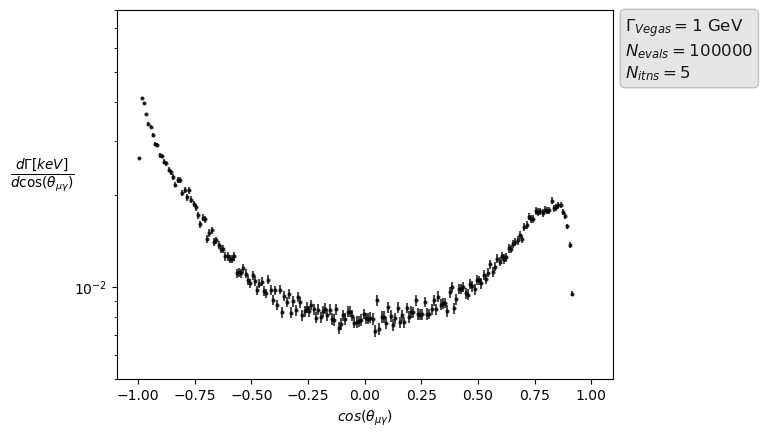

In [19]:
dI_cos = []
dI_cos_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos += [total_rate4['dI_4cos'][i].mean + total_rate6_1['dI_6_1cos'][i].mean + total_rate6_2['dI_6_2cos'][i].mean + total_rate6_3['dI_6_3cos'][i].mean + total_rate6_4['dI_6_4cos'][i].mean+ total_rate6_5['dI_6_5cos'][i].mean + total_rate8_6['dI_8_6cos'][i].mean + total_rate8_7['dI_8_7cos'][i].mean + total_rate8_8['dI_8_8cos'][i].mean+ total_rate8_9['dI_8_9cos'][i].mean + total_rate8_10['dI_8_10cos'][i].mean]
    dI_cos_errs += [total_rate4['dI_4cos'][i].sdev + total_rate6_1['dI_6_1cos'][i].sdev + total_rate6_2['dI_6_2cos'][i].sdev + total_rate6_3['dI_6_3cos'][i].sdev + total_rate6_4['dI_6_4cos'][i].sdev+ total_rate6_5['dI_6_5cos'][i].sdev + total_rate8_6['dI_8_6cos'][i].sdev + total_rate8_7['dI_8_7cos'][i].sdev + total_rate8_8['dI_8_8cos'][i].sdev+ total_rate8_9['dI_8_9cos'][i].sdev + total_rate8_10['dI_8_10cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(0.5 * 10**-2, 0.8 * 10**-1)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

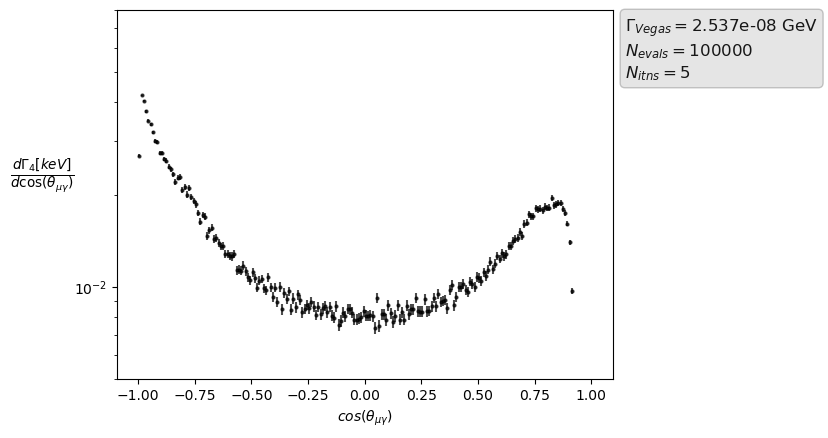

In [20]:
dI_cos4 = []
dI_cos4_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos4 += [total_rate4['dI_4cos'][i].mean]
    dI_cos4_errs += [total_rate4['dI_4cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos4) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos4_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_4, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(0.5 * 10**-2, 0.8 * 10**-1)
plt.ylabel(r'$\frac{d\Gamma_{4}[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

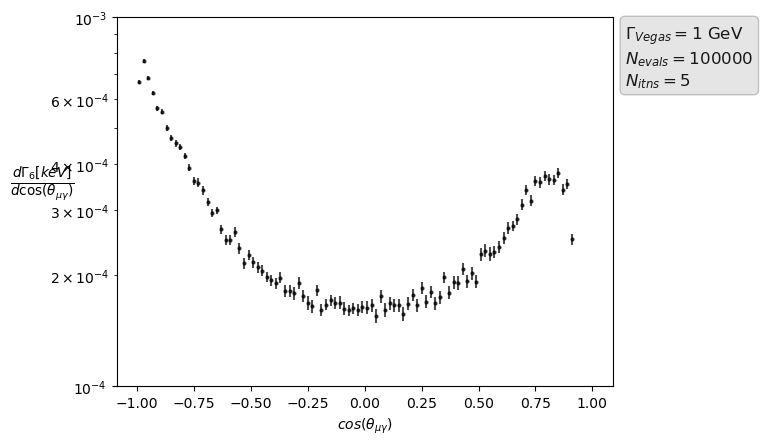

In [28]:
dI_cos6 = []
dI_cos6_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos6 += [total_rate6_1['dI_6_1cos'][i].mean + total_rate6_2['dI_6_2cos'][i].mean + total_rate6_3['dI_6_3cos'][i].mean + total_rate6_4['dI_6_4cos'][i].mean]
    dI_cos6_errs += [total_rate6_1['dI_6_1cos'][i].sdev + total_rate6_2['dI_6_2cos'][i].sdev + total_rate6_3['dI_6_3cos'][i].sdev + total_rate6_4['dI_6_4cos'][i].sdev]
        
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, -keV * np.array(dI_cos6) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos6_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(10**-4, 10**-3)
plt.ylabel(r'$\frac{d\Gamma_{6}[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

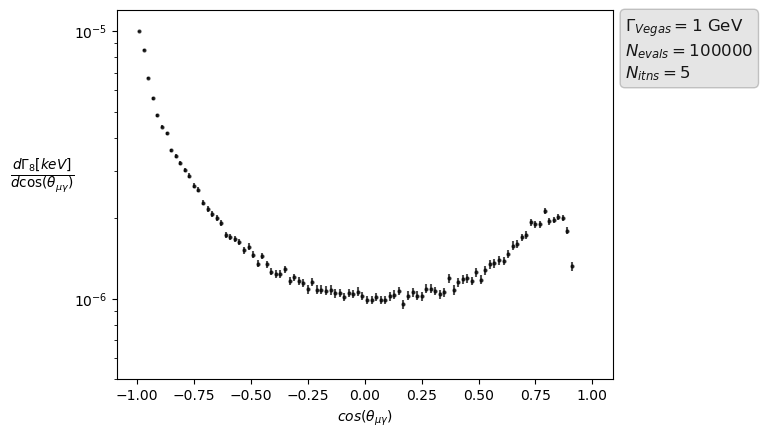

In [34]:
dI_cos8 = []
dI_cos8_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos8 += [total_rate8_5['dI_8_5cos'][i].mean + total_rate8_6['dI_8_6cos'][i].mean + total_rate8_7['dI_8_7cos'][i].mean + total_rate8_8['dI_8_8cos'][i].mean+ total_rate8_9['dI_8_9cos'][i].mean + total_rate8_10['dI_8_10cos'][i].mean]
    dI_cos8_errs += [total_rate8_5['dI_8_5cos'][i].sdev + total_rate8_6['dI_8_6cos'][i].sdev + total_rate8_7['dI_8_7cos'][i].sdev + total_rate8_8['dI_8_8cos'][i].sdev+ total_rate8_9['dI_8_9cos'][i].sdev + total_rate8_10['dI_8_10cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos8) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos8_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(0.5 * 10**-6, 1.2 * 10**-5)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{8}[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

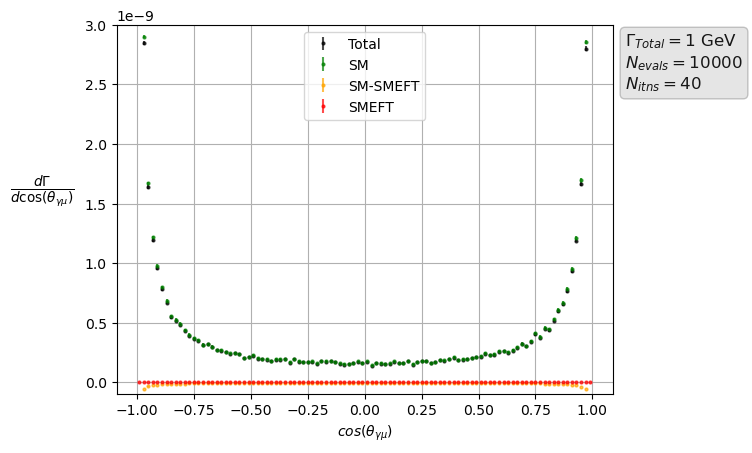

In [30]:
fig, ax = plt.subplots()

ax.errorbar(cos_s, np.array(dI_cos4)+np.array(dI_cos6)+np.array(dI_cos8), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_cos4_errs)+np.array(dI_cos6_errs)+np.array(dI_cos8_errs))
ax.errorbar(cos_s, np.array(dI_cos4), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_cos4_errs))
ax.errorbar(cos_s, np.array(dI_cos6), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_cos6_errs))
ax.errorbar(cos_s, np.array(dI_cos8), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_cos8_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Total}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\gamma\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\gamma\mu})$')
plt.ylim(-10**-10, 3 * 10**-9)
plt.legend()
#plt.xlim(0, 130)
plt.show()

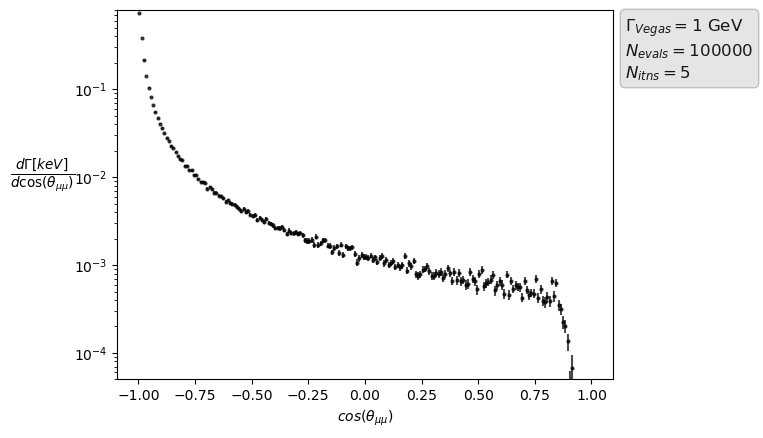

In [21]:
dI_cos_alt = []
dI_cos_alt_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos_alt += [total_rate4['dI_4cos_alt'][i].mean + total_rate6_1['dI_6_1cos_alt'][i].mean + total_rate6_2['dI_6_2cos_alt'][i].mean + total_rate6_3['dI_6_3cos_alt'][i].mean + total_rate6_4['dI_6_4cos_alt'][i].mean+ total_rate6_5['dI_6_5cos_alt'][i].mean + total_rate8_6['dI_8_6cos_alt'][i].mean + total_rate8_7['dI_8_7cos_alt'][i].mean + total_rate8_8['dI_8_8cos_alt'][i].mean+ total_rate8_9['dI_8_9cos_alt'][i].mean + total_rate8_10['dI_8_10cos_alt'][i].mean]
    dI_cos_alt_errs += [total_rate4['dI_4cos_alt'][i].sdev + total_rate6_1['dI_6_1cos_alt'][i].sdev + total_rate6_2['dI_6_2cos_alt'][i].sdev + total_rate6_3['dI_6_3cos_alt'][i].sdev + total_rate6_4['dI_6_4cos_alt'][i].sdev+ total_rate6_5['dI_6_5cos_alt'][i].sdev + total_rate8_6['dI_8_6cos_alt'][i].sdev + total_rate8_7['dI_8_7cos_alt'][i].sdev + total_rate8_8['dI_8_8cos_alt'][i].sdev+ total_rate8_9['dI_8_9cos_alt'][i].sdev + total_rate8_10['dI_8_10cos_alt'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos_alt) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos_alt_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(0.5 * 10**-4, 0.8 * 10**0)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

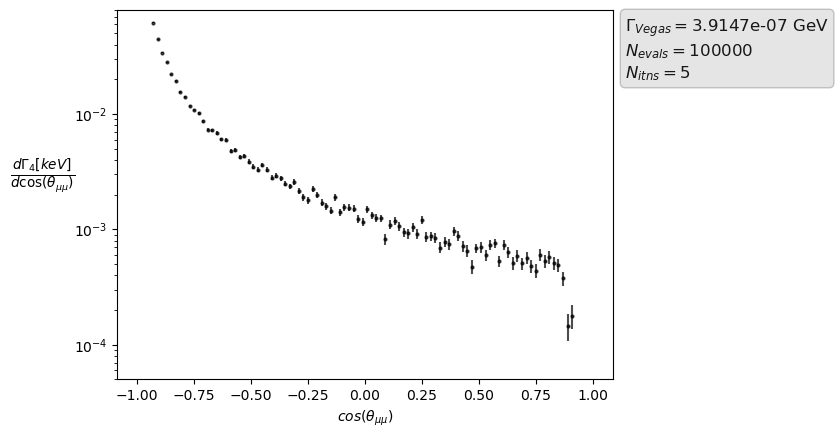

In [38]:
dI_cos4_alt = []
dI_cos4_alt_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos4_alt += [total_rate4['dI_4cos_alt'][i].mean]
    dI_cos4_alt_errs += [total_rate4['dI_4cos_alt'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos4_alt) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos4_alt_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_4, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(0.5 * 10**-4, 0.8 * 10**-1)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{4}[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

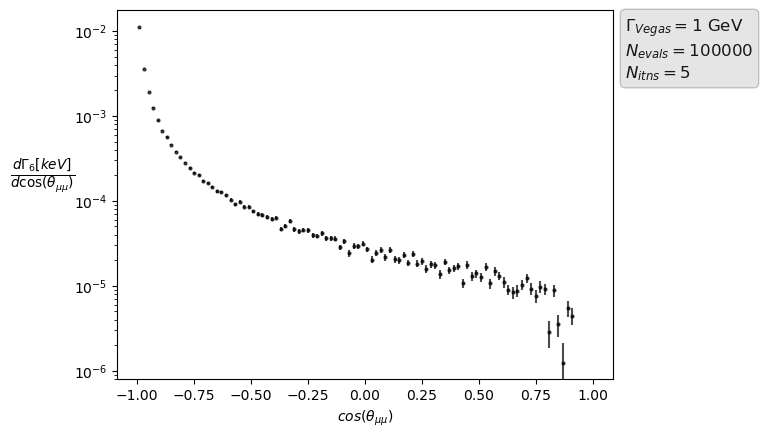

In [45]:
dI_cos6_alt = []
dI_cos6_alt_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos6_alt += [total_rate6_1['dI_6_1cos_alt'][i].mean + total_rate6_2['dI_6_2cos_alt'][i].mean + total_rate6_3['dI_6_3cos_alt'][i].mean + total_rate6_4['dI_6_4cos_alt'][i].mean]
    dI_cos6_alt_errs += [total_rate6_1['dI_6_1cos_alt'][i].sdev + total_rate6_2['dI_6_2cos_alt'][i].sdev + total_rate6_3['dI_6_3cos_alt'][i].sdev + total_rate6_4['dI_6_4cos_alt'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, -keV * np.array(dI_cos6_alt) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos6_alt_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
#plt.ylim(0.5 * 10**-6, 0.8 * 10**-1)
plt.ylabel(r'$\frac{d\Gamma_{6}[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

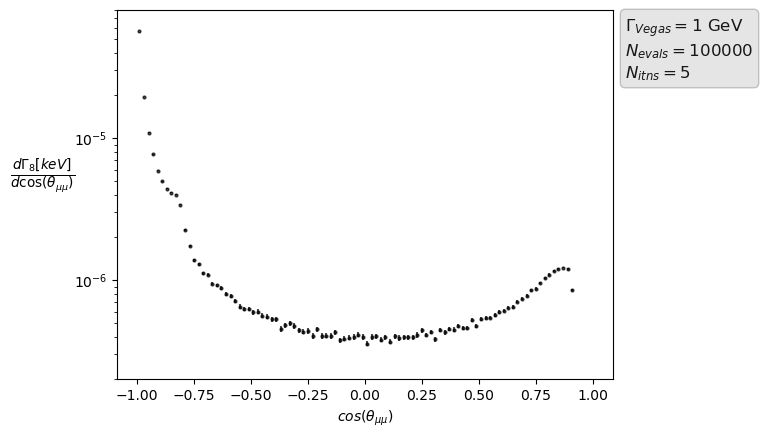

In [51]:
dI_cos8_alt = []
dI_cos8_alt_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dI_cos8_alt += [total_rate8_5['dI_8_5cos_alt'][i].mean + total_rate8_6['dI_8_6cos_alt'][i].mean + total_rate8_7['dI_8_7cos_alt'][i].mean + total_rate8_8['dI_8_8cos_alt'][i].mean+ total_rate8_9['dI_8_9cos_alt'][i].mean + total_rate8_10['dI_8_10cos_alt'][i].mean]
    dI_cos8_alt_errs += [total_rate8_5['dI_8_5cos_alt'][i].sdev + total_rate8_6['dI_8_6cos_alt'][i].sdev + total_rate8_7['dI_8_7cos_alt'][i].sdev + total_rate8_8['dI_8_8cos_alt'][i].sdev+ total_rate8_9['dI_8_9cos_alt'][i].sdev + total_rate8_10['dI_8_10cos_alt'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dI_cos8_alt) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_cos8_alt_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(0.2 * 10**-6, 0.8 * 10**-4)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{8}[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

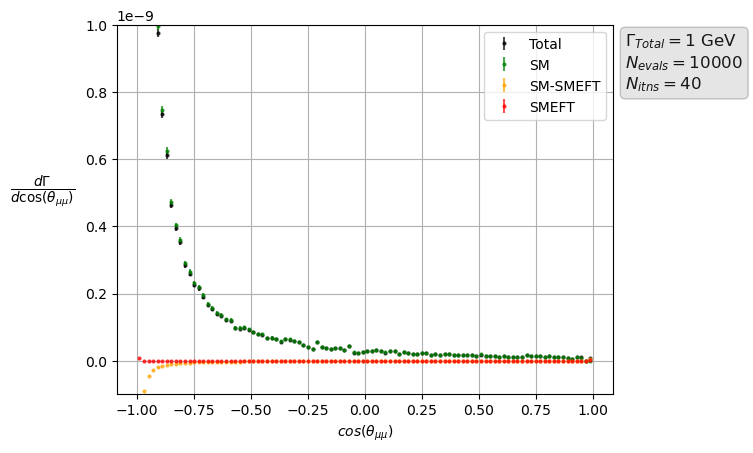

In [52]:
fig, ax = plt.subplots()

ax.errorbar(cos_s, np.array(dI_cos4_alt)+np.array(dI_cos6_alt)+np.array(dI_cos8_alt), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_cos4_alt_errs)+np.array(dI_cos6_alt_errs)+np.array(dI_cos8_alt_errs))
ax.errorbar(cos_s, np.array(dI_cos4_alt), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_cos4_alt_errs))
ax.errorbar(cos_s, np.array(dI_cos6_alt), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_cos6_alt_errs))
ax.errorbar(cos_s, np.array(dI_cos8_alt), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_cos8_alt_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Total}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.ylim(-1 * 10**-10, 10**-9)
plt.legend()
#plt.xlim(0, 130)
plt.show()

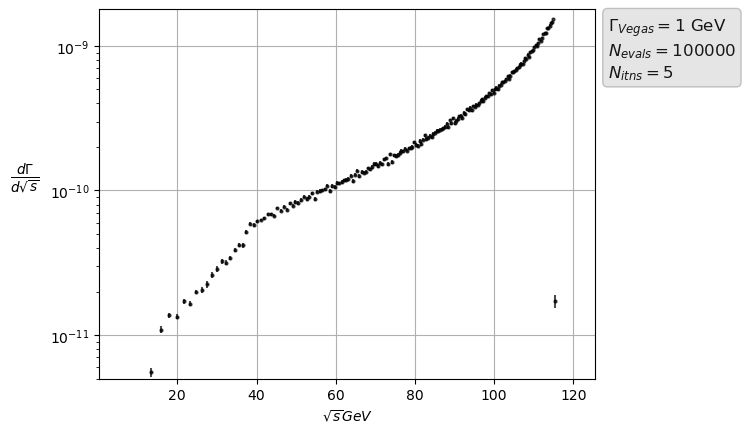

In [22]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dIs = []
dI_errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dIs += [(total_rate4['dI_4'][i].mean + total_rate6_1['dI_6_1'][i].mean + total_rate6_2['dI_6_2'][i].mean + total_rate6_3['dI_6_3'][i].mean + total_rate6_4['dI_6_4'][i].mean+ total_rate6_5['dI_6_5'][i].mean + total_rate8_6['dI_8_6'][i].mean + total_rate8_7['dI_8_7'][i].mean + total_rate8_8['dI_8_8'][i].mean+ total_rate8_9['dI_8_9'][i].mean + total_rate8_10['dI_8_10'][i].mean) / sdbins[i]]
    dI_errs += [(total_rate4['dI_4'][i].sdev + total_rate6_1['dI_6_1'][i].sdev + total_rate6_2['dI_6_2'][i].sdev + total_rate6_3['dI_6_3'][i].sdev + total_rate6_4['dI_6_4'][i].sdev+ total_rate6_5['dI_6_5'][i].sdev + total_rate8_6['dI_8_6'][i].sdev + total_rate8_7['dI_8_7'][i].sdev + total_rate8_8['dI_8_8'][i].sdev+ total_rate8_9['dI_8_9'][i].sdev + total_rate8_10['dI_8_10'][i].sdev) / sdbins[i]]
    
sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dIs), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(0.5 * 10**-11, 1.8 * 10**-9)
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.show()

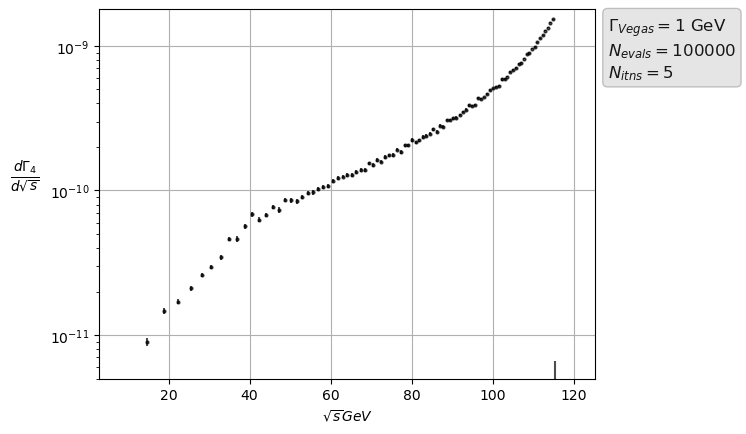

In [57]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_4s = []
dI_4errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_4s += [(total_rate4['dI_4'][i].mean) / sdbins[i]]
    dI_4errs += [(total_rate4['dI_4'][i].sdev) / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dI_4s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_4errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(0.5 * 10**-11, 1.8 * 10**-9)
plt.ylabel(r'$\frac{d\Gamma_{4}}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.show()

In [58]:
np.sum(total_rate4['dI_4']).mean

2.540209741745222e-08

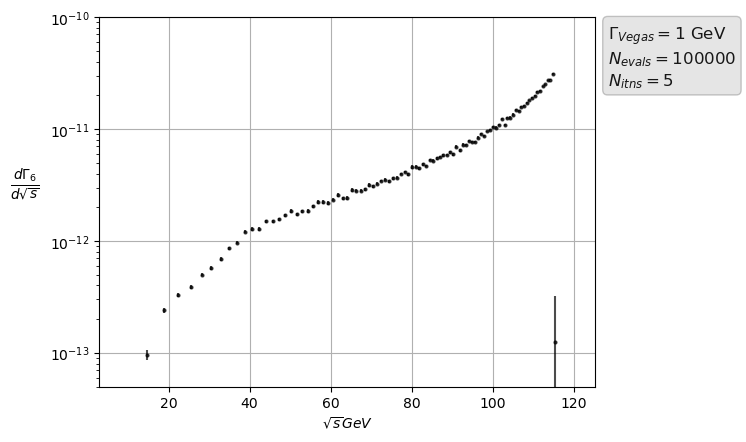

In [64]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_6s = []
dI_6errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_6s += [(total_rate6_1['dI_6_1'][i].mean + total_rate6_2['dI_6_2'][i].mean + total_rate6_3['dI_6_3'][i].mean + total_rate6_4['dI_6_4'][i].mean) / sdbins[i]]
    dI_6errs += [(total_rate6_1['dI_6_1'][i].sdev + total_rate6_2['dI_6_2'][i].sdev + total_rate6_3['dI_6_3'][i].sdev + total_rate6_4['dI_6_4'][i].sdev) / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, -np.array(dI_6s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_6errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(0.5 * 10**-13, 10**-10)
plt.ylabel(r'$\frac{d\Gamma_{6}}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.show()

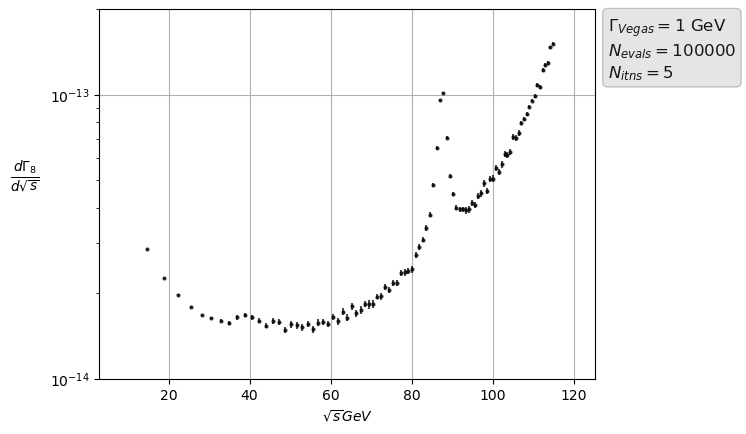

In [69]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_8s = []
dI_8errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_8s += [(total_rate8_5['dI_8_5'][i].mean + total_rate8_6['dI_8_6'][i].mean + total_rate8_7['dI_8_7'][i].mean + total_rate8_8['dI_8_8'][i].mean+ total_rate8_9['dI_8_9'][i].mean + total_rate8_10['dI_8_10'][i].mean) / sdbins[i]]
    dI_8errs += [(total_rate8_5['dI_8_5'][i].sdev + total_rate8_6['dI_8_6'][i].sdev + total_rate8_7['dI_8_7'][i].sdev + total_rate8_8['dI_8_8'][i].sdev+ total_rate8_9['dI_8_9'][i].sdev + total_rate8_10['dI_8_10'][i].sdev) / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dI_8s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_8errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylim(10**-14, 2 * 10**-13)
plt.ylabel(r'$\frac{d\Gamma_{8}}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.show()

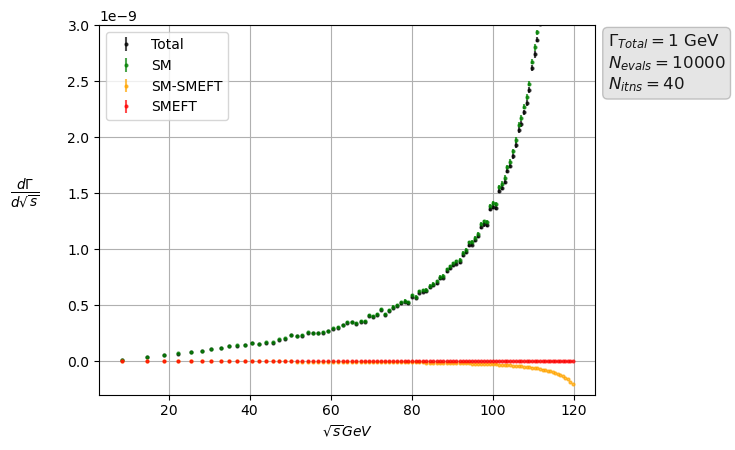

In [76]:
fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dI_4s)+np.array(dI_6s)+np.array(dI_8s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_4errs)+np.array(dI_6errs)+np.array(dI_8errs))
ax.errorbar(sqs, np.array(dI_4s), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_4errs))
ax.errorbar(sqs, np.array(dI_6s), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_6errs))
ax.errorbar(sqs, np.array(dI_8s), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_8errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Total}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.ylim(-3 * 10**-10, 3 * 10**-9)
plt.legend()
#plt.xlim(0, 130)
plt.show()

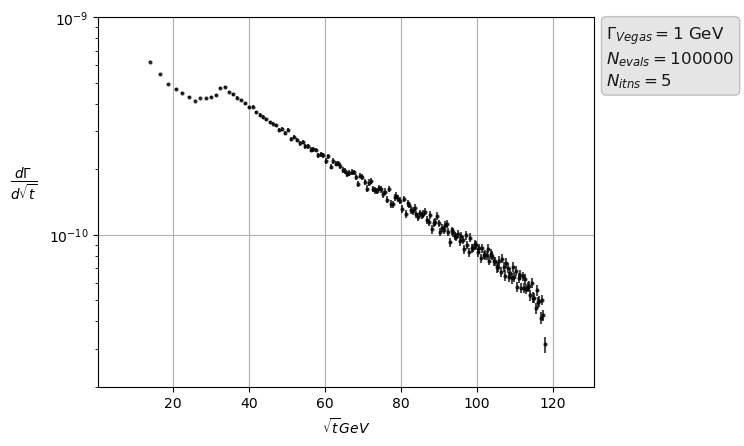

In [23]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_ts = []
dI_terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_ts += [(total_rate4['dI_4_t'][i].mean + total_rate6_1['dI_6_1t'][i].mean + total_rate6_2['dI_6_2t'][i].mean + total_rate6_3['dI_6_3t'][i].mean + total_rate6_4['dI_6_4t'][i].mean+ total_rate6_5['dI_6_5t'][i].mean + total_rate8_6['dI_8_6t'][i].mean + total_rate8_7['dI_8_7t'][i].mean + total_rate8_8['dI_8_8t'][i].mean+ total_rate8_9['dI_8_9t'][i].mean + total_rate8_10['dI_8_10t'][i].mean) / sdbins[i]]
    dI_terrs += [(total_rate4['dI_4_t'][i].sdev + total_rate6_1['dI_6_1t'][i].sdev + total_rate6_2['dI_6_2t'][i].sdev + total_rate6_3['dI_6_3t'][i].sdev + total_rate6_4['dI_6_4t'][i].sdev+ total_rate6_5['dI_6_5t'][i].sdev + total_rate8_6['dI_8_6t'][i].sdev + total_rate8_7['dI_8_7t'][i].sdev + total_rate8_8['dI_8_8t'][i].sdev+ total_rate8_9['dI_8_9t'][i].sdev + total_rate8_10['dI_8_10t'][i].sdev) / sdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(2 * 10**-11, 10**-9)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.show()

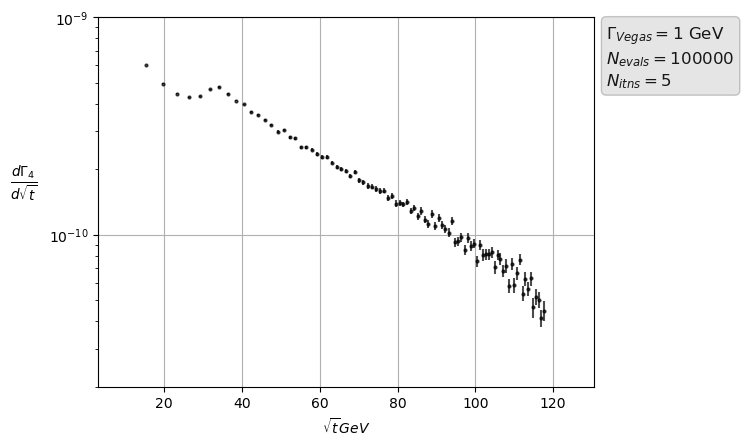

In [75]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_4ts = []
dI_4terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_4ts += [(total_rate4['dI_4_t'][i].mean) / sdbins[i]]
    dI_4terrs += [(total_rate4['dI_4_t'][i].sdev) / sdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_4ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_4terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(2 * 10**-11, 1 * 10**-9)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{4}}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.show()

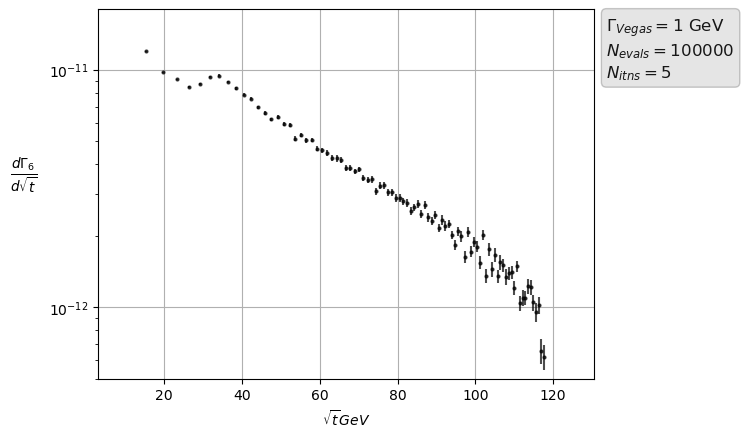

In [79]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_6ts = []
dI_6terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_6ts += [(total_rate6_1['dI_6_1t'][i].mean + total_rate6_2['dI_6_2t'][i].mean + total_rate6_3['dI_6_3t'][i].mean + total_rate6_4['dI_6_4t'][i].mean) / sdbins[i]]
    dI_6terrs += [(total_rate6_1['dI_6_1t'][i].sdev + total_rate6_2['dI_6_2t'][i].sdev + total_rate6_3['dI_6_3t'][i].sdev + total_rate6_4['dI_6_4t'][i].sdev) / sdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, -np.array(dI_6ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_6terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(5 * 10**-13, 1.8 * 10**-11)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{6}}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.show()

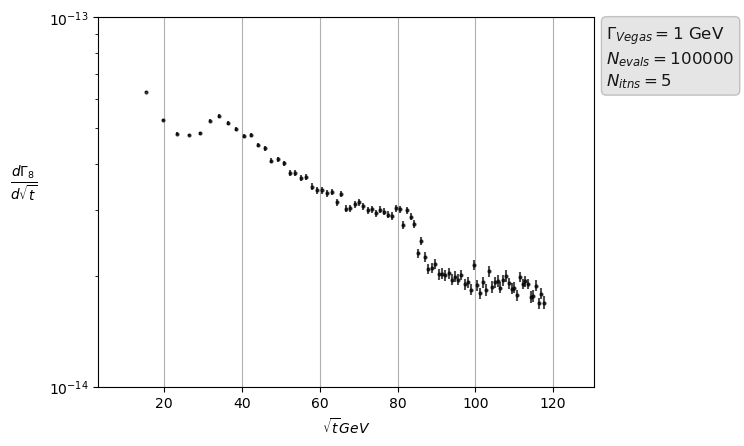

In [84]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

dI_8ts = []
dI_8terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_8ts += [(total_rate8_5['dI_8_5t'][i].mean + total_rate8_6['dI_8_6t'][i].mean + total_rate8_7['dI_8_7t'][i].mean + total_rate8_8['dI_8_8t'][i].mean+ total_rate8_9['dI_8_9t'][i].mean + total_rate8_10['dI_8_10t'][i].mean) / sdbins[i]]
    dI_8terrs += [(total_rate8_5['dI_8_5t'][i].sdev + total_rate8_6['dI_8_6t'][i].sdev + total_rate8_7['dI_8_7t'][i].sdev + total_rate8_8['dI_8_8t'][i].sdev+ total_rate8_9['dI_8_9t'][i].sdev + total_rate8_10['dI_8_10t'][i].sdev) / sdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_8ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_8terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.ylim(10**-14, 10**-13)
plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{8}}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.show()

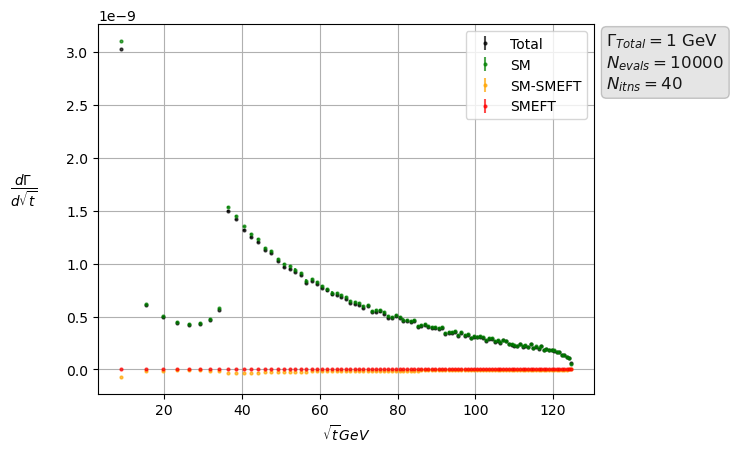

In [83]:
fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_4ts)+np.array(dI_6ts)+np.array(dI_8ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_4terrs)+np.array(dI_6terrs)+np.array(dI_8terrs))
ax.errorbar(sqt, np.array(dI_4ts), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_4terrs))
ax.errorbar(sqt, np.array(dI_6ts), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_6terrs))
ax.errorbar(sqt, np.array(dI_8ts), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_8terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Total}=$' +str(round(1, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(-1.6 * 10**-8, 1 * 10**-8)
plt.legend()
#plt.xlim(0, 130)
plt.show()